# email spam/ham



In [ ]:
## libraries 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_mail_data = pd.read_csv("/content/drive/MyDrive/datasets/mail_data_spam (2).csv")

In [ ]:
raw_mail_data .sample(5)

,Category,Message
2980,spam,"Xmas Offer! Latest Motorola, SonyEricsson & No..."
1003,ham,Yes..he is really great..bhaji told kallis bes...
1356,ham,Convey my regards to him
3760,ham,"GOD ASKED, ""What is forgiveness?"" A little chi..."
3649,ham,As per your request 'Maangalyam (Alaipayuthe)'...


In [ ]:
##replacing 8null values to string 
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [ ]:
raw_mail_data.shape

(5572, 2)

In [ ]:
raw_mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
raw_mail_data.duplicated().sum()

415

In [ ]:
raw_mail_data =raw_mail_data.drop_duplicates(keep='first')

In [ ]:
raw_mail_data.duplicated().sum()

0

In [ ]:
raw_mail_data.shape

(5157, 2)

## EDA

In [ ]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
raw_mail_data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
raw_mail_data['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

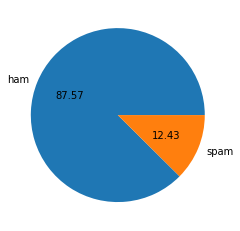

In [ ]:
import matplotlib.pyplot as plt
plt.pie(raw_mail_data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

# data is imbalanced

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
raw_mail_data['num_characters'] = raw_mail_data['Message'].apply(len)

In [ ]:
raw_mail_data.head()

,Category,Message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# num of words
raw_mail_data['num_words'] = raw_mail_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
raw_mail_data.head()

,Category,Message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,23
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
raw_mail_data['num_sentences'] = raw_mail_data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
raw_mail_data.head()

,Category,Message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
raw_mail_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.390537,1.965290
std,58.382922,13.307527,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
##label encoding 
## label spam as 0 ; &; ham as 1
## loc is used for boolean array 
mail_data.loc[mail_data['Category']== 'spam','Category',]=0

In [ ]:
mail_data.loc[mail_data['Category']== 'ham','Category',]=1

In [ ]:
# ham
raw_mail_data[raw_mail_data['Category'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.101417,1.822852
std,56.708301,13.488402,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
raw_mail_data[raw_mail_data['Category'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.472699,2.968799
std,30.399707,6.988134,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,44.000000,9.000000


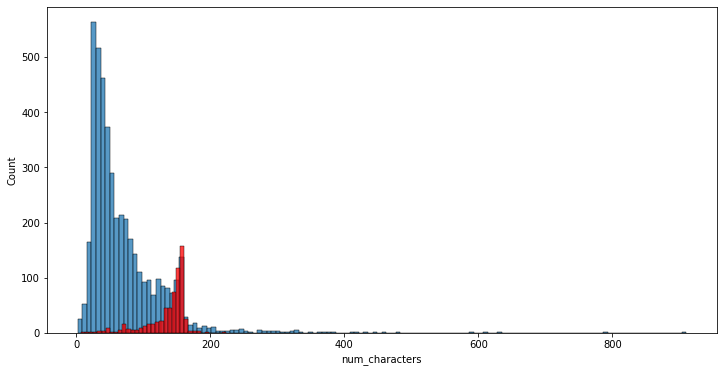

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(raw_mail_data[raw_mail_data['Category'] == 'ham']['num_characters'])
sns.histplot(raw_mail_data[raw_mail_data['Category'] == 'spam']['num_characters'],color='red')

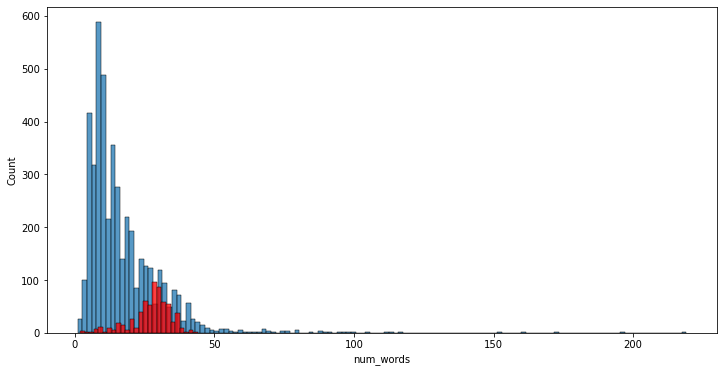

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(raw_mail_data[raw_mail_data['Category'] == 'ham']['num_words'])
sns.histplot(raw_mail_data[raw_mail_data['Category'] == 'spam']['num_words'],color='red')

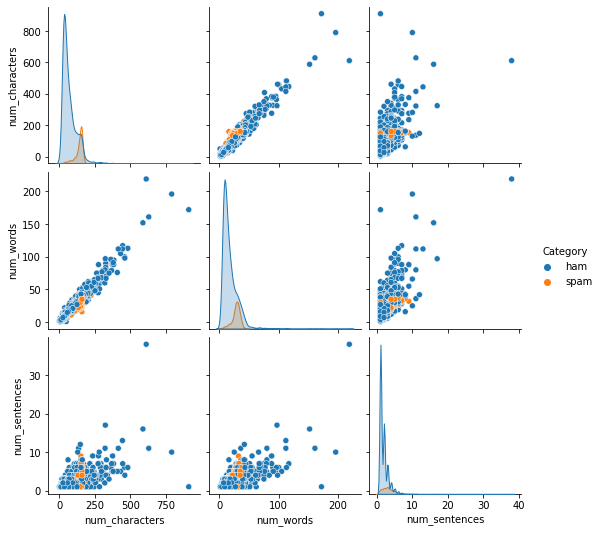

In [ ]:
sns.pairplot(raw_mail_data,hue='Category')

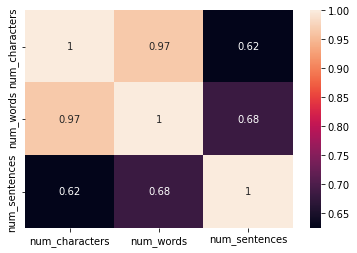

In [ ]:
sns.heatmap(raw_mail_data.corr(),annot=True)

## DISTRIBUTION OF DATA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


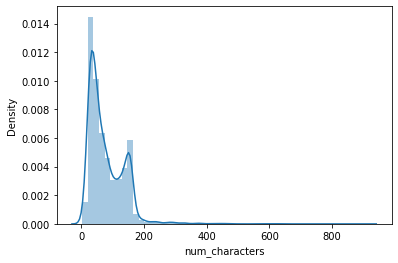

In [ ]:

sns.distplot(raw_mail_data['num_characters'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


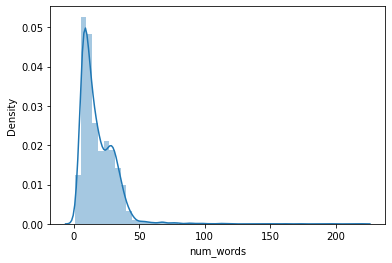

In [ ]:
sns.distplot(raw_mail_data['num_words'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


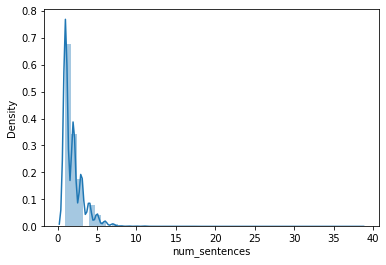

In [ ]:
sns.distplot(raw_mail_data['num_sentences'])

## 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [ ]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
transform_text("Nah I don't think he goes to usf, he lives around here though")

'nah think goe usf live around though'

## spam - 1
## ham - 0

In [ ]:
x=mail_data['Message']
y=mail_data['Category']


In [ ]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


## TRAIN TEST SPLIT

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 3)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [ ]:
from xgboost import XGBClassifier
pipeline = Pipeline(
    [
        ("count_vect", CountVectorizer()),
        ("tf_idf", TfidfTransformer()),
        ("clf", XGBClassifier()),
    ]
)
pipeline.fit(x_train,
             y_train)

Pipeline(steps=[('count_vect', CountVectorizer()),
                ('tf_idf', TfidfTransformer()), ('clf', XGBClassifier())])

In [ ]:
pipeline.fit(x_train,
             y_train)


Pipeline(steps=[('count_vect', CountVectorizer()),
                ('tf_idf', TfidfTransformer()), ('clf', XGBClassifier())])

In [ ]:
pipeline.predict(x_test)

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:

import pickle
pickle.dump(pipeline,open('spamclassifier.pkl','wb'))

In [ ]:
x_test

2632    URGENT! Your mobile No 077xxx WON a £2,000 Bon...
454     Ok i will tell her to stay out. Yeah its been ...
983     Congrats! 2 mobile 3G Videophones R yours. cal...
1282        Am I the only one who doesn't stalk profiles?
4610                               Y de asking like this.
                              ...                        
4827                        Haha, just what I was thinkin
5291      Xy trying smth now. U eat already? We havent...
3325    I don wake since. I checked that stuff and saw...
3561    Lol I know! Hey someone did a great inpersonat...
1136                      K do I need a login or anything
Name: Message, Length: 1115, dtype: object